In [1]:
# encoding: utf-8

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
focos = gpd.read_file(r"D:\Documentos\TrimestreIII\TopicosAvancadosProcessamentoImagens\Gilberto\focos-2016\focos\focos-2016.shp")

In [5]:
focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry
0,45465778.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP,Mata AtlÃ¢ntica,2016/04/06 16:43:05.000,f,0.136897,POINT (-50.321 -23.297)
1,45465782.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NOAA-18,Mata AtlÃ¢ntica,2016/11/24 22:44:22.000,f,0.954730,POINT (-50.232 -23.282)
2,45465784.0,AbatiÃ¡,ParanÃ¡,S,Brazil,AQUA_M-T,Mata AtlÃ¢ntica,2016/07/17 17:28:09.000,t,0.336125,POINT (-50.327 -23.311)
3,45465786.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP_375,Mata AtlÃ¢ntica,2016/04/06 16:47:52.000,f,0.171759,POINT (-50.324 -23.299)
4,45465788.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP_375,Mata AtlÃ¢ntica,2016/04/05 04:38:37.000,f,0.215059,POINT (-50.241 -23.266)


In [6]:
focos.dtypes

id            float64
municipio      object
estado         object
regiao         object
pais           object
satelite       object
bioma          object
timestamp      object
satelite_r     object
rand          float64
geometry       object
dtype: object

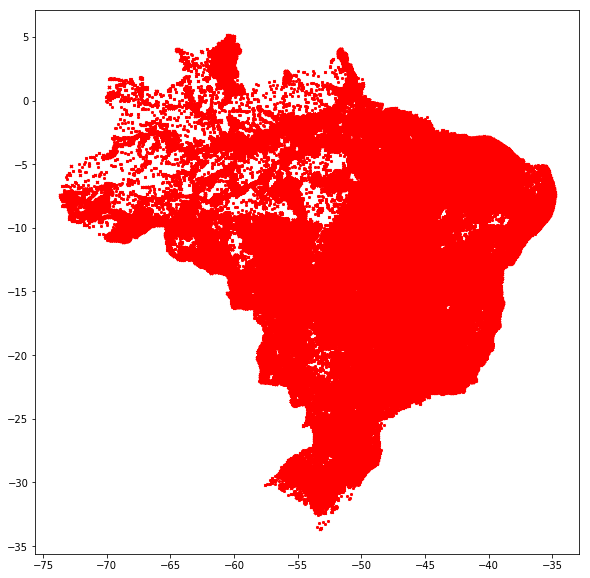

In [7]:
focos.plot(marker='x', color='red', markersize=5, figsize=(20, 10));

In [8]:

focos["timestamp"] = pd.to_datetime(focos["timestamp"])

In [9]:
focos.dtypes

id                   float64
municipio             object
estado                object
regiao                object
pais                  object
satelite              object
bioma                 object
timestamp     datetime64[ns]
satelite_r            object
rand                 float64
geometry              object
dtype: object

In [10]:
focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry
0,45465778.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP,Mata AtlÃ¢ntica,2016-04-06 16:43:05,f,0.136897,POINT (-50.321 -23.297)
1,45465782.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NOAA-18,Mata AtlÃ¢ntica,2016-11-24 22:44:22,f,0.954730,POINT (-50.232 -23.282)
2,45465784.0,AbatiÃ¡,ParanÃ¡,S,Brazil,AQUA_M-T,Mata AtlÃ¢ntica,2016-07-17 17:28:09,t,0.336125,POINT (-50.327 -23.311)
3,45465786.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP_375,Mata AtlÃ¢ntica,2016-04-06 16:47:52,f,0.171759,POINT (-50.324 -23.299)
4,45465788.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP_375,Mata AtlÃ¢ntica,2016-04-05 04:38:37,f,0.215059,POINT (-50.241 -23.266)


In [11]:
focos_to = focos[focos.estado == 'Tocantins']

In [15]:
focos_to_set = focos_to[focos.timestamp.dt.month == 9]

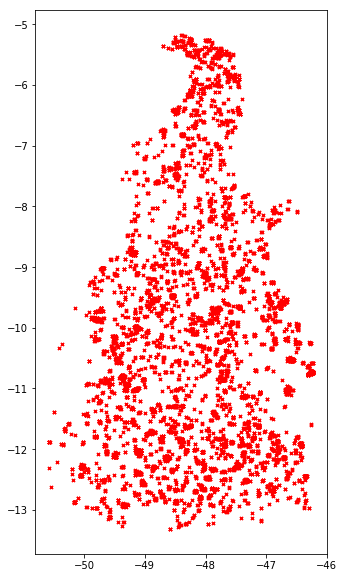

In [16]:
focos_to_nov.plot(marker='x', color='red', markersize=10, figsize=(20, 10));

In [17]:

focos_mes = focos.groupby(focos.timestamp.dt.month).estado.count()

In [18]:
type(focos_mes)

pandas.core.series.Series

In [19]:
focos_mes

timestamp
1      63344
2      30318
3      42647
4      27409
5      27191
6      51618
7     192234
8     462289
9     473060
10    376217
11    200916
12     92151
Name: estado, dtype: int64

In [20]:
import calendar

novo_indice = map(lambda v : calendar.month_abbr[v], focos_mes.index)

In [21]:
novo_indice

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [22]:
focos_mes = pd.Series(data=focos_mes.values, index=novo_indice)

In [23]:
focos_mes.name= "Número Focos/Mês"

focos_mes.index.name="mes"

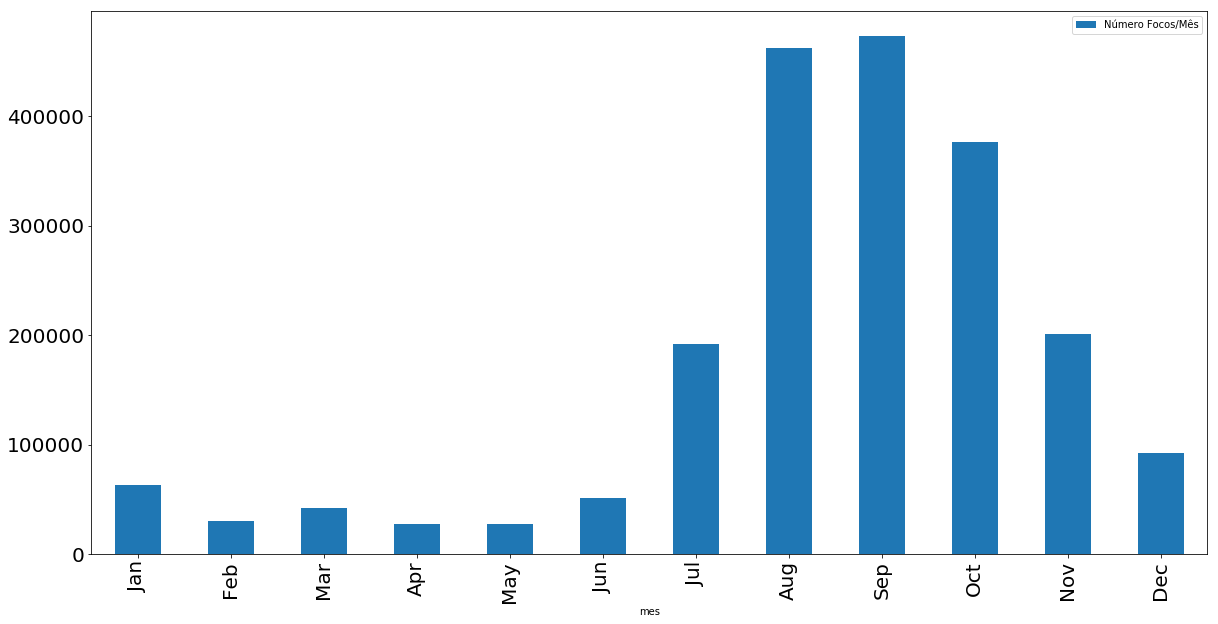

In [24]:
focos_mes.plot.bar(legend=True, fontsize=20, figsize=(20,10));

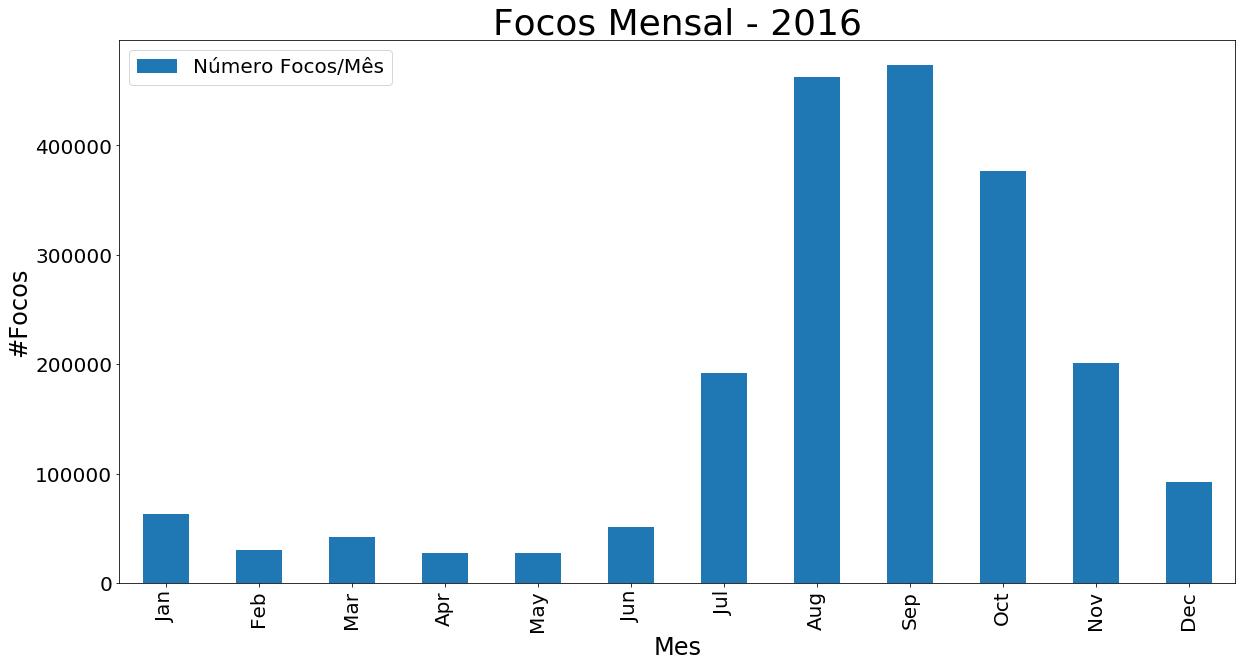

In [25]:
ax  = focos_mes.plot(kind="bar", legend=True, fontsize=20, figsize=(20,10));
ax.set_title("Focos Mensal - 2016", fontsize=36);
ax.set_xlabel("Mes", fontsize=24);
ax.set_ylabel("#Focos", fontsize=24);
ax.legend(loc=2, prop={'size': 20});

In [26]:
ax.figure.savefig(r"D:\Documentos\TrimestreIII\TopicosAvancadosProcessamentoImagens\Gilberto\focos-2016\focos\chart-focos-mes-2016.png",
                  dpi=100, format="png")

In [27]:
focos_bioma = focos.groupby("bioma").bioma.count()

In [28]:
type(focos_bioma)

pandas.core.series.Series

In [29]:
focos_bioma.index.name = "Biomas"
focos_bioma.name = "Numero Focos por Bioma"

focos_bioma

Biomas
AmazÃ´nia          916329
Caatinga           147268
Cerrado            750260
Mata AtlÃ¢ntica    157016
Pampa                8610
Pantanal            59904
Name: Numero Focos por Bioma, dtype: int64

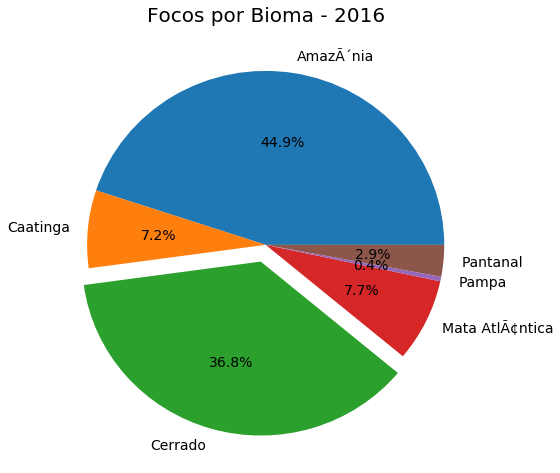

In [30]:
explode=[0.0, 0.0, 0.1, 0.0, 0.0, 0.0]
ax = focos_bioma.plot(kind="pie", explode=explode, autopct='%1.1f%%', figsize=(8,8), fontsize="14");
ax.set_title("Focos por Bioma - 2016", fontsize=20);
ax.set_ylabel("");

In [31]:
focos["mes"] = focos["timestamp"].dt.month

focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry,mes
0,45465778.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP,Mata AtlÃ¢ntica,2016-04-06 16:43:05,f,0.136897,POINT (-50.321 -23.297),4
1,45465782.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NOAA-18,Mata AtlÃ¢ntica,2016-11-24 22:44:22,f,0.954730,POINT (-50.232 -23.282),11
2,45465784.0,AbatiÃ¡,ParanÃ¡,S,Brazil,AQUA_M-T,Mata AtlÃ¢ntica,2016-07-17 17:28:09,t,0.336125,POINT (-50.327 -23.311),7
3,45465786.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP_375,Mata AtlÃ¢ntica,2016-04-06 16:47:52,f,0.171759,POINT (-50.324 -23.299),4
4,45465788.0,AbatiÃ¡,ParanÃ¡,S,Brazil,NPP_375,Mata AtlÃ¢ntica,2016-04-05 04:38:37,f,0.215059,POINT (-50.241 -23.266),4


In [32]:
pvt = pd.pivot_table(focos, values="id", index=["bioma"],
                     columns=["mes"], aggfunc="count",
                     fill_value=0, margins=True)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'total']

pvt

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
bioma,,,,,,,,,,,,,
AmazÃ´nia,52679.0,18054.0,31744.0,7990.0,7877.0,16001.0,64141.0,218200.0,192327.0,146745.0,107761.0,52810.0,916329.0
Caatinga,2107.0,656.0,721.0,828.0,976.0,1461.0,6401.0,17265.0,22381.0,49123.0,29636.0,15713.0,147268.0
Cerrado,2586.0,7468.0,4384.0,10956.0,14619.0,27348.0,93377.0,181966.0,201569.0,145384.0,48529.0,12074.0,750260.0
Mata AtlÃ¢ntica,5429.0,3659.0,5466.0,7199.0,3375.0,5707.0,22333.0,32690.0,32994.0,17663.0,11276.0,9225.0,157016.0
Pampa,160.0,225.0,147.0,110.0,80.0,505.0,1081.0,2650.0,1502.0,721.0,529.0,900.0,8610.0
Pantanal,383.0,256.0,183.0,326.0,264.0,596.0,4900.0,9517.0,22287.0,16578.0,3185.0,1429.0,59904.0
All,63344.0,30318.0,42645.0,27409.0,27191.0,51618.0,192233.0,462288.0,473060.0,376214.0,200916.0,92151.0,2039387.0


In [33]:
pvt = pd.pivot_table(focos, values="id", index=["bioma"],
                     columns=["mes"], aggfunc="count",
                     fill_value=0)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

pvt

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
bioma,,,,,,,,,,,,
AmazÃ´nia,52679,18054,31744,7990,7877,16001,64141,218200,192327,146745,107761,52810
Caatinga,2107,656,721,828,976,1461,6401,17265,22381,49123,29636,15713
Cerrado,2586,7468,4384,10956,14619,27348,93377,181966,201569,145384,48529,12074
Mata AtlÃ¢ntica,5429,3659,5466,7199,3375,5707,22333,32690,32994,17663,11276,9225
Pampa,160,225,147,110,80,505,1081,2650,1502,721,529,900
Pantanal,383,256,183,326,264,596,4900,9517,22287,16578,3185,1429


In [34]:
pvt.describe()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,10557.333333,5053.000000,7107.500000,4568.166667,4531.833333,8603.000000,32038.833333,77048.000000,78843.333333,62702.333333,33486.000000,15358.50000
std,20722.482927,6963.560354,12282.131326,4717.938466,5743.805478,10910.454271,38050.821838,96507.835377,92098.413660,66455.259342,40633.701589,19257.34913
min,160.000000,225.000000,147.000000,110.000000,80.000000,505.000000,1081.000000,2650.000000,1502.000000,721.000000,529.000000,900.00000
25%,814.000000,356.000000,317.500000,451.500000,442.000000,812.250000,5275.250000,11454.000000,22310.500000,16849.250000,5207.750000,3378.00000
50%,2346.500000,2157.500000,2552.500000,4013.500000,2175.500000,3584.000000,14367.000000,24977.500000,27687.500000,33393.000000,20456.000000,10649.50000
75%,4718.250000,6515.750000,5195.500000,7792.250000,6751.500000,13427.500000,53689.000000,144647.000000,152493.750000,121318.750000,43805.750000,14803.25000
max,52679.000000,18054.000000,31744.000000,10956.000000,14619.000000,27348.000000,93377.000000,218200.000000,201569.000000,146745.000000,107761.000000,52810.00000


In [35]:
pvt = pd.pivot_table(focos, values="id", index=["estado", "municipio"], columns=["mes"], aggfunc="count", fill_value=0, margins=True)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'total']

pvt.head()

jan  fev  mar  abr  mai   jun    jul    ago     set  \
estado municipio                                                           
Acre   AcrelÃ¢ndia   0.0  0.0  0.0  0.0  0.0   8.0  100.0  676.0   578.0   
       Assis Brasil  1.0  0.0  0.0  1.0  2.0  14.0    9.0  208.0   461.0   
       BrasilÃ©ia    5.0  0.0  0.0  1.0  5.0  27.0   83.0  541.0  1517.0   
       Bujari        1.0  1.0  0.0  0.0  7.0  46.0  170.0  563.0   497.0   
       Capixaba      0.0  7.0  4.0  2.0  2.0  17.0   78.0  774.0   497.0   

                       out   nov  dez   total  
estado municipio                               
Acre   AcrelÃ¢ndia    94.0  23.0  8.0  1487.0  
       Assis Brasil  131.0   7.0  0.0   834.0  
       BrasilÃ©ia    387.0  59.0  9.0  2634.0  
       Bujari         67.0  12.0  1.0  1365.0  
       Capixaba      335.0  32.0  0.0  1748.0

In [36]:
top5 = pvt["total"].sort_values(ascending=False).iloc[1:6]
top5

estado              municipio         
Mato Grosso do Sul  CorumbÃ¡              43303.0
RondÃ´nia           Porto Velho           39618.0
Tocantins           Lagoa Da ConfusÃ£o    27915.0
ParÃ¡               Altamira              23765.0
Amazonas            LÃ¡brea               21812.0
Name: total, dtype: float64

In [37]:
top5 = focos.groupby(["estado", "municipio"]).municipio.count().sort_values(ascending=False)[0:5]
top5

estado              municipio         
Mato Grosso do Sul  CorumbÃ¡              43303
RondÃ´nia           Porto Velho           39618
Tocantins           Lagoa Da ConfusÃ£o    27915
ParÃ¡               Altamira              23765
Amazonas            LÃ¡brea               21812
Name: municipio, dtype: int64

In [38]:
municipios = gpd.read_file(r"D:\OneDrive - inpe.br\Necessario\Shp_Brasil_Bahia\Brasil_municipios\BRMUE250GC_SIR.shp")

municipios.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ALTA FLORESTA D'OESTE,1100015,POLYGON ((-62.19464667599993 -11.8274570359999...
1,ARIQUEMES,1100023,POLYGON ((-62.53647840499997 -9.73221504899993...
2,CABIXI,1100031,POLYGON ((-60.37075376399997 -13.3636324999999...
3,CACOAL,1100049,POLYGON ((-61.00079610999995 -11.2973710129999...
4,CEREJEIRAS,1100056,POLYGON ((-61.49976157699996 -13.0052505029999...


In [39]:
municipios.columns = ["nome", "cod_ibge", "geometry"]

municipios.head()

,nome,cod_ibge,geometry
0,ALTA FLORESTA D'OESTE,1100015,POLYGON ((-62.19464667599993 -11.8274570359999...
1,ARIQUEMES,1100023,POLYGON ((-62.53647840499997 -9.73221504899993...
2,CABIXI,1100031,POLYGON ((-60.37075376399997 -13.3636324999999...
3,CACOAL,1100049,POLYGON ((-61.00079610999995 -11.2973710129999...
4,CEREJEIRAS,1100056,POLYGON ((-61.49976157699996 -13.0052505029999...


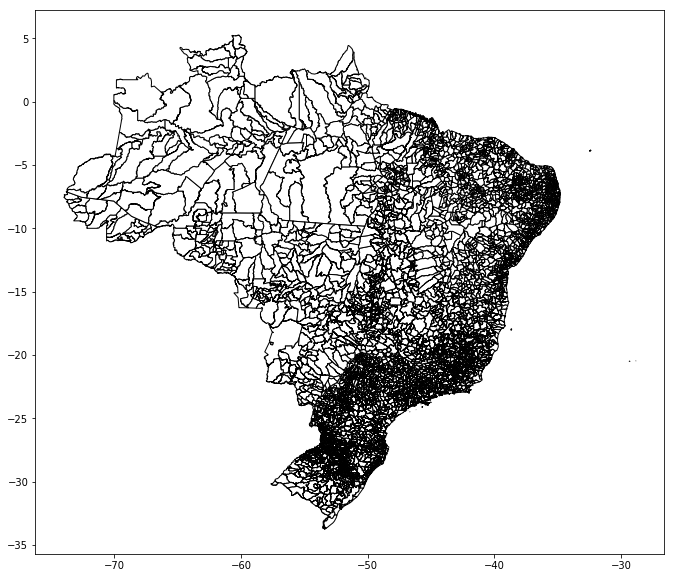

In [40]:
municipios.plot(color='white', edgecolor='black', figsize=(20, 10));

In [41]:
munic_to = municipios[municipios["cod_ibge"].str[0:2] == "17"]

munic_to.head()

,nome,cod_ibge,geometry
311,ABREULÂNDIA,1700251,POLYGON ((-49.39149645199996 -9.17452846299994...
312,AGUIARNÓPOLIS,1700301,POLYGON ((-47.57648308799998 -6.41472972499997...
313,ALIANÇA DO TOCANTINS,1700350,POLYGON ((-48.71252417899996 -11.1699301449999...
314,ALMAS,1700400,POLYGON ((-47.26256828099997 -10.9813311369999...
315,ALVORADA,1700707,POLYGON ((-49.03874863299996 -12.2244394629999...


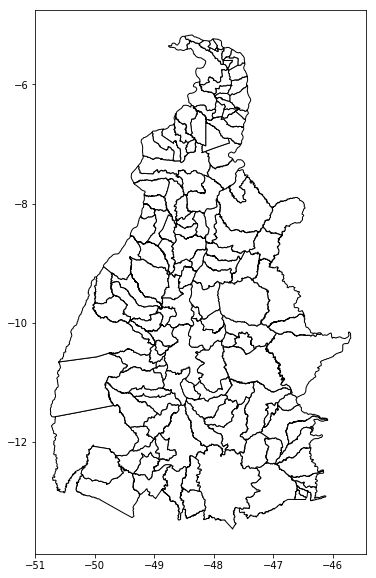

In [43]:
munic_to.plot(color='white', edgecolor='black', figsize=(20, 10));

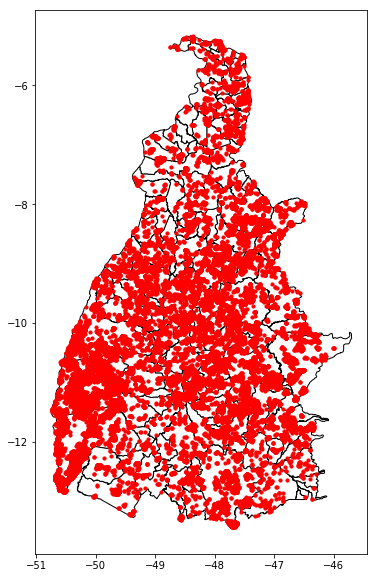

In [44]:
#Focos em Tocatins para o mês de Setembro de 2016.
base = munic_to.plot(color='white', edgecolor='black', figsize=(20, 10));

focos_to = focos[focos.estado == "Tocantins"]
focos_to_set = focos_to[focos.timestamp.dt.month == 9]

focos_to_set.plot(ax=base, marker='o', color='red', markersize=10);